#### Pandas 객체(자료구조)
- 1차원 : 시리즈(Series)
- 2차원 : 데이터프레임(DataFrame)

In [1]:
import pandas as pd

In [2]:
#pandas 모듈을 불러와서 pd라는 별칭으로 사용하겠다.

In [3]:
# 1차원 시리즈 생성
# list이용
# 도시별 인구수 나타내는 series 생성
population = pd.Series([9602000,3344000,1488000,2419000])
population

0    9602000
1    3344000
2    1488000
3    2419000
dtype: int64

In [4]:
# 시리즈 데이터에 인덱스를 지정하여 생성
population = pd.Series([9602000,3344000,1488000,2419000],
                      index = ['서울','부산','광주','데구'])
population


서울    9602000
부산    3344000
광주    1488000
데구    2419000
dtype: int64

In [5]:
# 딕셔너리를 이용해서 시리즈 생성하기
# 면적에 대한 정보 생성
# 딕셔너리명 = {'key1',:value1,'key2',:value2,....}
area = pd.Series({'서울':505.2, '부산':770.1, "광주":501.1, '대구':883.5})
area

서울    505.2
부산    770.1
광주    501.1
대구    883.5
dtype: float64

- 데이터 속성 확인

In [6]:
#1. value 값만 확인하고 싶을 때
population.values # 출력결과의 형태 --> numpy 배열

array([9602000, 3344000, 1488000, 2419000], dtype=int64)

In [7]:
# 2. 시리즈의 인덱스 값을 확인하고 싶을 때
population.index #object ==> 문자열 자료형

Index(['서울', '부산', '광주', '데구'], dtype='object')

In [8]:
# 3. 시리즈의 데이터 타입 확인
population.dtype
area.dtype

dtype('float64')

##### 시리즈(Series) 이름지정
- 시리즈의 이름은 DataFrame의 컬럼명이 된다.

In [9]:
population

서울    9602000
부산    3344000
광주    1488000
데구    2419000
dtype: int64

In [10]:
population.name ='2020 인구'
population

서울    9602000
부산    3344000
광주    1488000
데구    2419000
Name: 2020 인구, dtype: int64

In [11]:
population.index.name = '도시'
population

도시
서울    9602000
부산    3344000
광주    1488000
데구    2419000
Name: 2020 인구, dtype: int64

In [12]:
population.index.name = '지역'
population

지역
서울    9602000
부산    3344000
광주    1488000
데구    2419000
Name: 2020 인구, dtype: int64

##### 시리즈 데이터  갱신, 삭제, 추가

In [13]:
population

지역
서울    9602000
부산    3344000
광주    1488000
데구    2419000
Name: 2020 인구, dtype: int64

In [14]:
# 갱신 (수정) ==> 1. 인덱스 위치 접근, 2. 값을 대입
population['부산'] = 3500000
population

지역
서울    9602000
부산    3500000
광주    1488000
데구    2419000
Name: 2020 인구, dtype: int64

In [15]:
# 삭제 : drop()
# population.drop('부산', inplace =True) 완전 삭제 # 데이터를 삭제하고 원래 위치에 반영(초기화)
# inplace의 기본값은 False
# population = population.drop('부산') #삭제된 데이터 결과를 원래의 변수에 대입


In [16]:
# 추가 : 없는 키값을 불러주고 대입
# '전주' : 1400000
population['전주'] = 140000
population


지역
서울    9602000
부산    3500000
광주    1488000
데구    2419000
전주     140000
Name: 2020 인구, dtype: int64

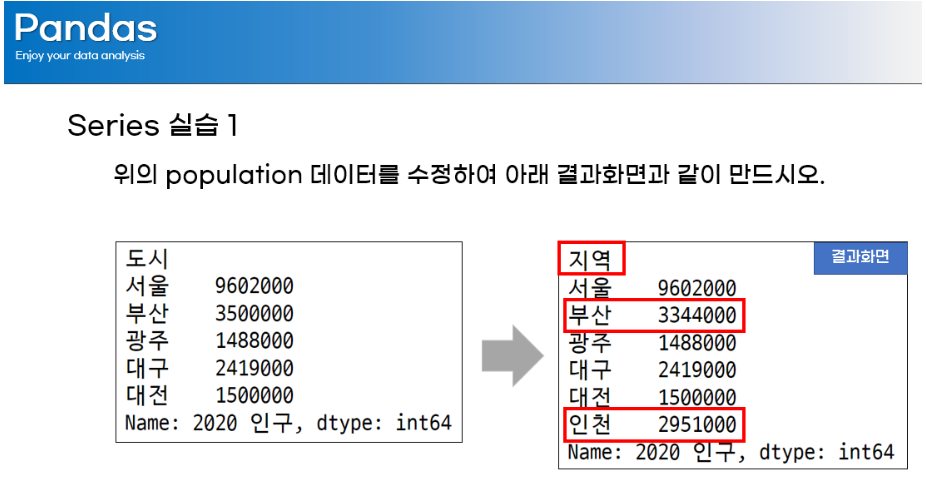

In [17]:
# 인덱스 이름 변경 지역 ==> 도시
population.index.name = '도시'
population
# 부산 데이터 변경
population['부산'] = 3344000
population
population['인천'] = 2951000
population

도시
서울    9602000
부산    3344000
광주    1488000
데구    2419000
전주     140000
인천    2951000
Name: 2020 인구, dtype: int64

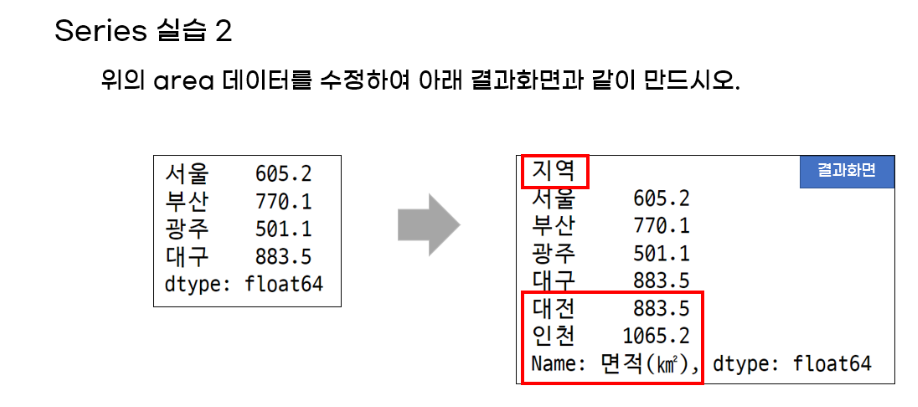


In [18]:
# 인덱스 이름 설정
area.index.name = '지역'
# 시리즈 이름 설정
area.name = "면적㎞"
# 데이터 추가
area['전주 '] =883.5
area['인천 '] =1065.2
area

지역
서울      505.2
부산      770.1
광주      501.1
대구      883.5
전주      883.5
인천     1065.2
Name: 면적㎞, dtype: float64

##### 시리즈 병합 (concat)
- 1차원을 연결하여 2차원으로 변환
- 시리즈의 이름이 데이터프레임의 컬럼명이 됨
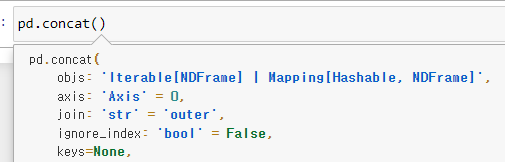


In [19]:
# axis = 0 : 행방향
# axis = 1 : 열방향
df = pd.concat([population, area])
df

서울     9602000.0
부산     3344000.0
광주     1488000.0
데구     2419000.0
전주      140000.0
인천     2951000.0
서울         505.2
부산         770.1
광주         501.1
대구         883.5
전주         883.5
인천        1065.2
dtype: float64

In [20]:
df2 = pd.concat([population,area], axis = 1)
df2

,2020 인구,면적㎞
서울,9602000.0,505.2
부산,3344000.0,770.1
광주,1488000.0,501.1
데구,2419000.0,NaN
전주,140000.0,NaN
인천,2951000.0,NaN
대구,NaN,883.5
전주,NaN,883.5
인천,NaN,1065.2


##### 2차원 데이터프레임(DataFrame) 생성

In [21]:
# list이용 데이터프레임 생성
data = [[9602000, 605.2],[2419000,883.5],[14000000,883.5],[2951000,1065.2]] # 이중 리스트
df3 = pd.DataFrame(data)
df3

,0,1
0,9602000,605.2
1,2419000,883.5
2,14000000,883.5
3,2951000,1065.2


In [22]:
# 인덱스명, 컬럼명 설정
df3 = pd.DataFrame(data,index =['광주','대구','전주','인천'],
            columns=['2020 인구','면적(㎢)'])
df3 # 2 차원 데이터 프레임

,2020 인구,면적(㎢)
광주,9602000,605.2
대구,2419000,883.5
전주,14000000,883.5
인천,2951000,1065.2


In [23]:
# 딕셔너리를 이용하여 데이터프레임 생성
data = {'2020인구' : [1488000,2419000,1400000,2951000],
        '면적(㎢)' : [501.1,883.5,883.5,1065]}
df4 = pd.DataFrame(data, index=['광주','대구','전주','인천'])
df4

,2020인구,면적(㎢)
광주,1488000,501.1
대구,2419000,883.5
전주,1400000,883.5
인천,2951000,1065.0


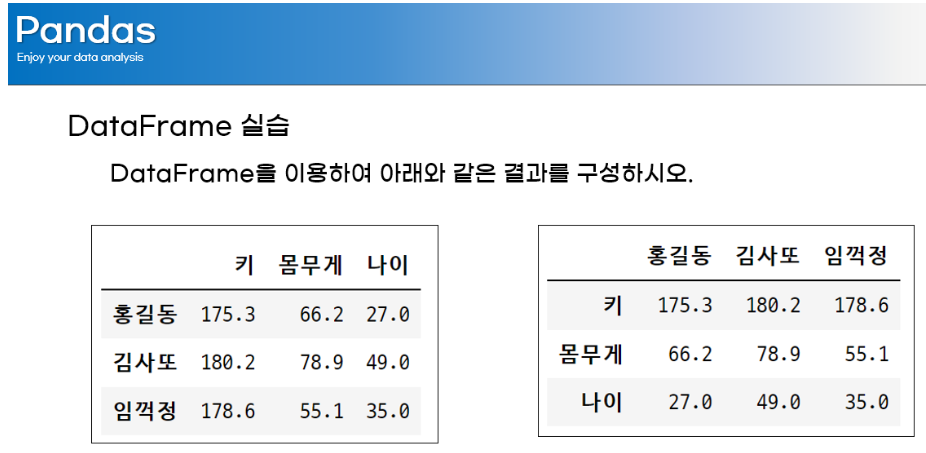

In [24]:
실습 = [[175.3,66.2,27.0],[180.2,78.9,49.0],[178.6,55.1,35.0]] 
실습 = pd.DataFrame(실습,index =['홍길동','김사또','임꺽정'],
            columns=['키','몸무게','나이'])
실습

실습1 = {'키' : [175.3, 180.2 ,178.6],
        '몸무게' : [66.2,78.9,55.1],
       '나이': [27.0,49.0,35.0]}
실습1 = pd.DataFrame(실습1, index=['홍길동','김사또','임꺽정'])
실습1

,키,몸무게,나이
홍길동,175.3,66.2,27.0
김사또,180.2,78.9,49.0
임꺽정,178.6,55.1,35.0


In [25]:
# 행과 열을 전환하는 키워드.T(전치 - transpace)
실습1.T
#.T는의 결과는 계속 바뀔 수 있다.
실습1.T.T

,키,몸무게,나이
홍길동,175.3,66.2,27.0
김사또,180.2,78.9,49.0
임꺽정,178.6,55.1,35.0


#### Pandas 데이터 접근하기 : 인덱싱 & 슬라이싱

##### 시리즈 인덱싱

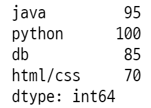


In [96]:
stud1 = pd.Series({'java':95,'python':100,'db':85,'html/css':70})
stud1

java         95
python      100
db           85
html/css     70
dtype: int64

In [97]:
# 인덱싱 --> java 데이터 접근
stud1['java']
stud1[0]

95

In [28]:
#html/css 데이터 접근
stud1['html/css']
stud1[0]

95

In [29]:
# 여러개의 데이터를 한번에 인덱싱하기
# java,db 데이터 접근
stud1[0::2]
stud1[['java','db']]
stud1[[0,2]]

java    95
db      85
dtype: int64

In [30]:
stud1[['java','db']]

java    95
db      85
dtype: int64

In [31]:
#python부터 db 접근해보기
stud1['python':'db'] # 문자열로 접근할 때는 뒷값이 포함
stud1[1:3] #인덱스 번호로 접근할 때는 뒷값이 포함이 안된다.

python    100
db         85
dtype: int64

In [32]:
#print(),display --> 출력결과물 비교
# java부터 python 까지 접근해보기
display(stud1[0:2])
display(stud1['java':'python'])
display(stud1[1:])
#python부터 끝까끼지 접근해보기

display(stud1['python':])

java       95
python    100
dtype: int64

java       95
python    100
dtype: int64

python      100
db           85
html/css     70
dtype: int64

python      100
db           85
html/css     70
dtype: int64

##### 시리즈 불리언 인덱싱

In [33]:
#데이터 안에서 85점 이상인 과목 확인하기
stud1[stud1 >= 85]

java       95
python    100
db         85
dtype: int64

In [34]:
#85점 이상인 과목만 확인하기
stud1[stud1 >= 85].index

Index(['java', 'python', 'db'], dtype='object')

In [35]:
# 90점 이상인 과목 접근하기
stud1[stud1 >= 90].index

Index(['java', 'python'], dtype='object')

In [36]:
#90점 미만인 과목만 접근하기
stud1[stud1 < 90].index

Index(['db', 'html/css'], dtype='object')

In [37]:
#75점 이상 90점 미만인 과목 접근하기(두 개의 조건을 연결 - 비트연산&)
stud1[(stud1 >= 75) & (stud1 < 90)].index

Index(['db'], dtype='object')

##### 2차원 데이터 프레임 데이터 접근


In [38]:
df_stud = pd.DataFrame({'java':[95,85],'python':[100,95],'db':[85,85],'html':[70,75]},
            index = ['hc','jh'])

In [39]:
# python 성적 데이터 접근
df_stud['python'] #1차원
# 2차원에서 []열면 값을 입력 컬럼이라고 인식
# 열에 대한 인덱싱을 수행
df_stud['db'] # 1차원

hc    85
jh    85
Name: db, dtype: int64

In [40]:
df_stud[['db']]
#데이터프레임으로 출력하고자 하면, 하나의 열이지만[[]] 표현하면 가능,
#[[]] ==> 행과 열을 가져오므로 대괄호 2개

,db
hc,85
jh,85


In [41]:
# 여러개의 컬럼 데이터 접근
# java, python 데이터 접근
#[] : 행데이터, [[]]: 열데이터
df_stud[['java','python']] # 컬럼 2개에 접근 ==> 2차원으로 반환

,java,python
hc,95,100
jh,85,95


In [42]:
# python에서 html/css 까지 접근
# df_stud[컬럼명]
# df_stud[값:값] ==> 행으로 접근
df_stud['python':'html/css']
df_stud['hc':'jh'] # 행인덱싱

,java,python,db,html
hc,95,100,85,70
jh,85,95,85,75


##### ★★ loc, iloc 인덱서 ★★
- loc 인덱서
    - 문자열 기반 데이터 접근(실제 인덕스 값을 사용하여 데이터 접근)
    - 행접근 : df.loc[행],df.loc[시작행:끝행],df.loc[[행1,행3,행5]]
    - 열접근 : df.loc[:,열], df.loc[:,시작열:끝열], df.loc[:,[열1,열3,열 5]]
- iloc 인덱서
    - numpy array에서 제공하는 인덱스번호 기반으로 데이터 접근 (눈에 보이지 않는 인덱스에도 접근)
    - 행접근 : df.iloc[행인덱스],df.iloc[시작행인덱스,끝행인덱스],df.iloc[[행1인덱스,행3인덱스,행4인덱스]]
    - 열접근 : df.iloc[:,열인덱스]. df.iloc[:,시작열인덱스:끝열인덱스], df.iloc[:,[열1인덱스,열3인덱스]]
- 배열.loc[행,열], 배열.iloc[행,열]
- loc : location 위치
- iloc : int location 위치

In [43]:
df_stud

,java,python,db,html
hc,95,100,85,70
jh,85,95,85,75


In [44]:
# db 컬럼에 접근
df_stud.loc[:,'db']
# df_stud.iloc[:,'db'] #문자열을 입력하면 오류 발생, iloc --> 숫자로 접근해야함.
df_stud.iloc[:,2]

hc    85
jh    85
Name: db, dtype: int64

In [45]:
#java 과목에 접근해보기
#loc
df_stud.loc[:,'java']
#iloc
df_stud.iloc[:,0]

hc    95
jh    85
Name: java, dtype: int64

In [46]:
#python에서 db 까지 과목 성적 접근하기
#loc
df_stud.loc[:,'python':"db"]
#iloc
df_stud.iloc[:,[1,2]]
#컬럼인덱싱
df_stud[['python','db']]

,python,db
hc,100,85
jh,95,85


In [47]:
# 행 접근
# 효창씨의 데이터 접근하기
# loc
df_stud.loc['hc']
# loc
df_stud.iloc[0]

java       95
python    100
db         85
html       70
Name: hc, dtype: int64

In [48]:
#데이터 프레임을 종현, 효창 순서로 보이게 출랙해보기

# loc
df_stud.loc[::-1]
# df_stud.loc[['jh','hc']]
# loc
df_stud.iloc[::-1]

,java,python,db,html
jh,85,95,85,75
hc,95,100,85,70


#####  데이터프레임 불리언 인덱싱

In [49]:
df_stud

,java,python,db,html
hc,95,100,85,70
jh,85,95,85,75


In [50]:
#'python'dml 성적이 95점 이상인 사람의 수 몇 명일까?
df_stud[df_stud['python'] >= 95].shape #행의 갯수 - 배열의 크기로 확인

(2, 4)

In [51]:
len(df_stud[df_stud['python'] >= 95].index) # 인덱스로 접근해서 길이함수 이용

2

In [52]:
df_stud[df_stud['python'] >= 95].index.size # 인덱스의 요소갯수로 확인

2

In [53]:
df_stud.loc[:, 'python']

hc    100
jh     95
Name: python, dtype: int64

In [54]:
df_stud.iloc[:, 1]

hc    100
jh     95
Name: python, dtype: int64

In [100]:
# java 85점 이상인 사람의 'Html/css' 점수 출력해보기
# 1. 'java' >= 85
df_stud['java']>=85
# len(df_stud[df_stud.loc[:, 'python'] >= 85].index)
# 2. 'html/css' 점수 접근
# df_stud.loc[:,'html']

df_stud[df_stud.loc[:,'java']>=85]['html']
df_stud[df_stud.loc[:,'java']>=85].loc[:, 'html']
df_stud[df_stud.loc[:,'java']>=85].iloc[:,-1]
# df_stud.iloc[df_stud.loc[:,'java']>=85][:,3] 에러 발생
df_stud.loc[df_stud.loc[:,'java']>=85,'html']
#불라온 안댁상운 loc 인덱서만 사용할 수 있다.


,java,python,db,html
hc,95,100,85,70
jh,85,95,85,75


#### 시리즈간 연산

In [56]:
population

도시
서울    9602000
부산    3344000
광주    1488000
데구    2419000
전주     140000
인천    2951000
Name: 2020 인구, dtype: int64

In [57]:
area

지역
서울      505.2
부산      770.1
광주      501.1
대구      883.5
전주      883.5
인천     1065.2
Name: 면적㎞, dtype: float64

In [101]:
#연산 수행하기
population + area
population - area
population * area

광주     7.456368e+08
대구              NaN
데구              NaN
부산     2.575214e+09
서울     4.850930e+09
인천              NaN
인천              NaN
전주              NaN
전주              NaN
dtype: float64

In [59]:
df2

,2020 인구,면적㎞
서울,9602000.0,505.2
부산,3344000.0,770.1
광주,1488000.0,501.1
데구,2419000.0,NaN
전주,140000.0,NaN
인천,2951000.0,NaN
대구,NaN,883.5
전주,NaN,883.5
인천,NaN,1065.2


In [60]:
# 인구밀도 = 인구수 /면적
population/area
# df2 데이터 프레임에 컬럼 추가하기
df2["인구밀도"] = population/area
df2.round(1)

,2020 인구,면적㎞,인구밀도
서울,9602000.0,505.2,19006.3
부산,3344000.0,770.1,4342.3
광주,1488000.0,501.1,2969.5
데구,2419000.0,NaN,NaN
전주,140000.0,NaN,NaN
인천,2951000.0,NaN,NaN
대구,NaN,883.5,NaN
전주,NaN,883.5,NaN
인천,NaN,1065.2,NaN


#### 유용한 함수

##### 데이터 정렬 하수
- sort_value : 데이터 값을 기준으로 정렬(기본값 : 오름차순)
- sort_index : 인덱스 값을 기준으로 정렬

In [61]:
# sort_values(ascending =True)기본값은 오름차순
# 내림차순으로 정렬 : ascending =False
df2['인구밀도'].sort_values(ascending=False)

서울     19006.334125
부산      4342.293209
광주      2969.467172
데구              NaN
전주              NaN
인천              NaN
대구              NaN
전주              NaN
인천              NaN
Name: 인구밀도, dtype: float64

In [62]:
# 인덱스 정렬
df2['인구밀도'].sort_index()
# 데이터의 컬럼명을 확인하는 키워드
df2.columns
df2.index

Index(['서울', '부산', '광주', '데구', '전주', '인천', '대구', '전주 ', '인천 '], dtype='object')

In [63]:
# 2차원 데이터 value 정렬
df2.sort_values(by = ['면적㎞','2020 인구'])

,2020 인구,면적㎞,인구밀도
광주,1488000.0,501.1,2969.467172
서울,9602000.0,505.2,19006.334125
부산,3344000.0,770.1,4342.293209
대구,NaN,883.5,NaN
전주,NaN,883.5,NaN
인천,NaN,1065.2,NaN
전주,140000.0,NaN,NaN
데구,2419000.0,NaN,NaN
인천,2951000.0,NaN,NaN


##### 카운팅 하는 함수


In [64]:
df2['면적㎞'].value_counts()

883.5     2
505.2     1
770.1     1
501.1     1
1065.2    1
Name: 면적㎞, dtype: int64

In [65]:
df2['면적㎞'].value_counts().values

array([2, 1, 1, 1, 1], dtype=int64)

##### 데이터 삭제하는 함수

In [102]:
df2.drop('인구밀도')

KeyError: "['인구밀도'] not found in axis"

In [ ]:
# axis = 0 : 행방향
# axis = 1 : 열방향
df2.drop('인구밀도',axis = 1, inplace = True)

In [ ]:
df2

In [ ]:
# 서울 데이터 삭제해보기
# df 조회하기
df2.drop('서울',axis = 0 ,inplace = True)


In [ ]:
df2

In [ ]:
# 여려개(전주, 인천)를 지우고 싶을 때 
df2.drop(['전주','인천'],axis = 0 ,inplace = True)
# df 조회하기

In [ ]:
df2

#### 데이터 불러오는 함수


In [ ]:
# 한글 불러오는 encoding 방식 : cp949, utf8, euc-kr
pd.read_csv('data/score.csv', encoding = 'euc-kr')

In [105]:
score = pd.read_csv('data/score.csv',
            index_col = '과목',
            encoding = 'euc-kr')# 데이터 프레임

In [110]:
#데이터 확인하기
# 크기 확인 : shape
score.shape
# 데이터 타입
# 데이터프레임의 데이터 타입 확인은 각의 데이터로 접근해야 한다.
score['1반'].dtype
#컬럼명(이름) 확인
score.columns
#행이름
score['1반'].dtype
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


##### 데이터 정보 출력하는 함수

In [111]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 수학 to 과학
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1반      5 non-null      int64
 1   2반      5 non-null      int64
 2   3반      5 non-null      int64
 3   4반      5 non-null      int64
dtypes: int64(4)
memory usage: 200.0+ bytes


In [112]:
# 결측치 개수 확인해보기
#.isnull()
score.isnull().sum()

1반    0
2반    0
3반    0
4반    0
dtype: int64

##### 결측치인지 아닌지 확인하는 함수

In [ ]:
score.isnull()
# 결측치 0 : True, 결측치X : False

##### 총합을 구하는 함수

In [ ]:
score.isnull().sum(axis = 0)

##### 학급별 순위(성적이 높은 순부터)

In [ ]:
sum1 = score.sum(axis = 0).sort_values(ascending=False)

##### 과목별 합계를 계산해서 '합계' 컬럼으로 구하기


In [117]:
#과목별합계
score.sum(axis = 1) #열방향으로 총합을 구함
score['합계'] = score.sum(axis = 1)
score

,1반,2반,3반,4반,합계
과목,,,,,
수학,45,44,73,39,804
영어,76,92,45,69,1128
국어,47,92,45,69,1012
사회,92,81,85,40,1192
과학,11,79,47,26,652


In [118]:
score.shape

(5, 5)

In [127]:

score['합계']/len(score.columns[:3])

과목
수학    268.000000
영어    376.000000
국어    337.333333
사회    397.333333
과학    217.333333
Name: 합계, dtype: float64

#### 과목별 평균을 계산하여 컬럼 추가하기
- '평균' 컬럼 추가

In [166]:
score['합계']/4
score['합계']/score.columns[:4].size
score['평균'] = score['합계']/len(score.columns[:4])

In [161]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45,44,73,39,804,201.0
영어,76,92,45,69,1128,282.0
국어,47,92,45,69,1012,253.0
사회,92,81,85,40,1192,298.0
과학,11,79,47,26,652,163.0


In [138]:
score['평균'] = score.loc[:, :'4반'].mean(axis=1)

In [ ]:
score

##### 반 평균 계산해서 새로운 행으로 추가하기
 - '반평균'행 추가
 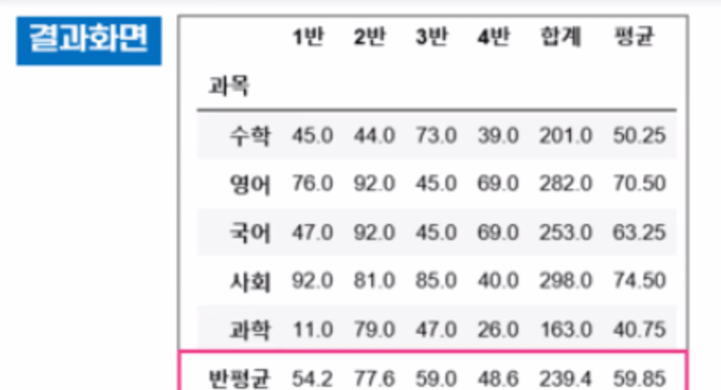

In [167]:
 score.loc[:].mean(axis=0)

1반     54.2
2반     77.6
3반     59.0
4반     48.6
합계    957.6
평균    239.4
dtype: float64

In [169]:
score.iloc[:,:3].mean()

1반    54.2
2반    77.6
3반    59.0
dtype: float64

In [ ]:

# 인덱서를 이용해서 행 추가
score.loc['반평균'] =  score.mean()

In [ ]:
 score

##### 최댓값, 최송 구하는 함수
- min,max

In [ ]:
#max()
score.max(axis =1)
#min()
score.min(axis =1)

##### 1~4 반까지 점수 중 과목별 가장 큰 값과 가장 작은 값의 차를 구하시오
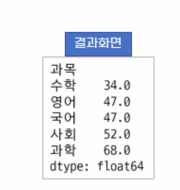

In [ ]:
 (score.iloc[:,:4].max(axis = 1))-( score.iloc[:,:4].min(axis = 1))

#### cut 함수 : 수치형 데이터 ->범주형 데이터

In [71]:
ages = [0,2,10,21,23,37,31,61,20,41,32,100] 
bins = [0,15,30,40,60,99] # 구간 설정
labels = ['미성년자','청년','장년',"중년",'노년']
cats = pd.cut(ages, bins= bins,labels = labels)

cats
pd.Series(cats)


0      NaN
1     미성년자
2     미성년자
3       청년
4       청년
5       장년
6       장년
7       노년
8       청년
9       중년
10      장년
11     NaN
dtype: category
Categories (5, object): ['미성년자' < '청년' < '장년' < '중년' < '노년']

##### groupby() : 데이터를 그룹별로 묶어 집계낼 수 있게 하는 함수

In [84]:
s1 = pd.Series([1,0,1,0,1])
s2 = pd.Series(['female','female','male','male','female'])
s3 = pd.Series([1,2,3,4,5])

ti = pd.concat([s1,s2,s3],axis =1)
ti.columns=['Servived','Sex','PassengerId']
ti

,Servived,Sex,PassengerId
0,1,female,1
1,0,female,2
2,1,male,3
3,0,male,4
4,1,female,5


In [85]:
# 성별에 따른 생존자 수 확인하기
ti[['Servived','Sex']].groupby('Sex').sum() #성별을 기준으로 묶어서 결과를 반환

,Servived
Sex,
female,2
male,1


In [94]:
#성별에 따른 생존자 수/ 사망자 수 확인하기
ti.groupby(by=['Sex','Servived']).count()
#count()

PassengerId
Sex    Servived             
female 0                   1
       1                   2
male   0                   1
       1                   1